### APPLE QUALITY DATASET

This dataset was generously provided by an American agricultural company.  The purpose of this dataset is to predict whether an apple fruit is of good quality or not, based on certain measurements included in the dataset.

This dataset contains information about various attributes of a set of fruits, which provides insight into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crispness, juiciness, ripeness, acidity, and quality. The data has been scaled and cleaned for ease of use.

We built a classification model to categorize fruits based on their characteristics and built a model to predict the quality rating of fruits using various attributes.

- A_id: Unique identifier for each fruit
- Size: Size of the fruit
- Weight: Weight of the fruit
- Sweetness: Degree of sweetness of the fruit
- Crunchiness: Texture indicating the crunchiness of the fruit
- Juiciness: Level of juiciness of the fruit
- Ripeness: Stage of ripeness of the fruit
- Acidity: Acidity level of the fruit
- Quality: Overall quality of the fruit

### IMPORT LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import (
    KFold,
    GridSearchCV,
    cross_val_score
)

### LOAD DATASET

In [2]:
# Membaca data dari file CSV
data = pd.read_csv('D:\BOOTCAMP DIGITAL SKOLA\quality_apple.csv')  # Ganti 'nama_file.csv' dengan nama file yang sesuai
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
data.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
data.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [5]:
data = data[data['Acidity'] != 'Created_by_Nidula_Elgiriyewithana']

In [6]:
data.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


### EDA(EXPLORATORY DATA ANALYSIS) 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [8]:
#CHANGE DATA TYPE
columns_to_convert = ['Acidity']
data[columns_to_convert] = data[columns_to_convert].astype(float)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11044\1815506745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_convert] = data[columns_to_convert].astype(float)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [10]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [11]:
data.drop('A_id', axis=1, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11044\3984044487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('A_id', axis=1, inplace=True)


In [12]:
data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [13]:
#CHECK MISSING VALUE 
data.isna().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

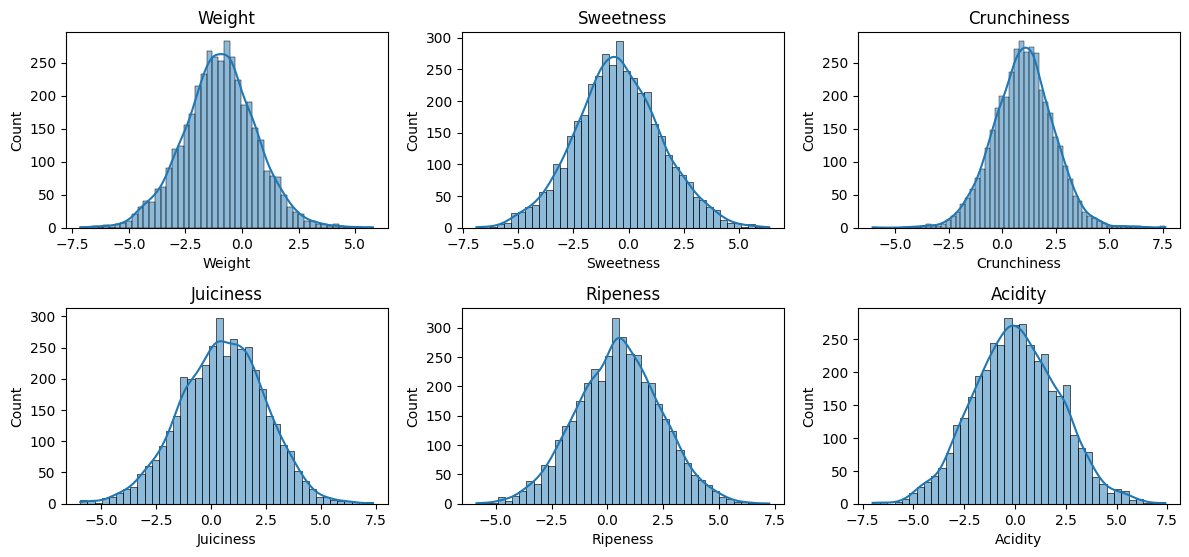

In [14]:
#CHECK DATA DISTRIBUTION

# Visualisasi distribusi untuk setiap fitur numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[1:7], start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [15]:
# Memisahkan fitur (X) dan target (y)
X = data.drop('Quality', axis=1)  # Menghapus kolom 'Quality' dari fitur
y = data['Quality']

In [16]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Membangun model Random Forest Classifier
model_1 = DecisionTreeClassifier()
model_2 = RandomForestClassifier(n_estimators=200, random_state=42)
model_3 = LogisticRegression()
model_4 = GradientBoostingClassifier()
model_5 = KNeighborsClassifier()

models = [model_1, 
          model_2, 
          model_3,
          model_4,
          model_5,
         ]


In [18]:
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

model_5.fit(X_train, y_train)
y_pred_5 = model_5.predict(X_test)


In [19]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test, y_pred))

DecisionTreeClassifier()
              precision    recall  f1-score   support

         bad       0.81      0.80      0.80       401
        good       0.80      0.81      0.80       399

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800

RandomForestClassifier(n_estimators=200, random_state=42)
              precision    recall  f1-score   support

         bad       0.91      0.90      0.91       401
        good       0.90      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800

LogisticRegression()
              precision    recall  f1-score   support

         bad       0.75      0.76      0.75       401
        good       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75 

In [20]:
# Melatih dan menguji setiap model
for i, model in enumerate(models, start=1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model {i}: Accuracy = {accuracy}")

Model 1: Accuracy = 0.80125
Model 2: Accuracy = 0.90625
Model 3: Accuracy = 0.75375
Model 4: Accuracy = 0.87
Model 5: Accuracy = 0.8975


### MODEL TUNING

In [21]:
# Let's choose the highest 4 models
# RandomForestClassifier
rf_model = RandomForestClassifier( )

# Model Tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_cv_model = GridSearchCV(
    rf_model,
    rf_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(rf_cv_model.best_params_)

# Final Model
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [22]:
#KNN
knn_model = KNeighborsClassifier( )

# Model Tuning
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_cv_model = GridSearchCV(
    knn_model,
    knn_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(knn_cv_model.best_params_)

# Final Model
knn_tuned = KNeighborsClassifier(**knn_cv_model.best_params_).fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}


In [23]:
# Melakukan prediksi menggunakan model Random Forest yang telah dituning
y_pred_rf = rf_cv_model.predict(X_test)

# Menampilkan classification report untuk model Random Forest
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print()

# Melakukan prediksi menggunakan model K-Nearest Neighbors yang telah dituning
y_pred_knn = knn_cv_model.predict(X_test)

# Menampilkan classification report untuk model K-Nearest Neighbors
print("Classification Report for K-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

         bad       0.92      0.89      0.91       401
        good       0.89      0.92      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800


Classification Report for K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

         bad       0.91      0.91      0.91       401
        good       0.91      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



It was found that the superior model was the KNeighbors Classifier Model.

### Save The Model

In [24]:
# Buat direktori model
if not os.path.exists('model'):
    os.makedirs('model')

# Simpan model Kneighbors Classifier
with open('model/Kneighbors.sav', 'wb') as f:
    pickle.dump(model, f)


In [25]:
loaded_model = pickle.load(open('model/Kneighbors.sav', 'rb'))


feature_list = {'Size': '0.278540', 
                'Weight': '-1.715505', 
                'Sweetness': '0.121217', 
                'Crunchiness': '-1.154075', 
                'Juiciness': '1.266677', 
                'Ripeness': '-0.776571', 
                'Acidity': '1.599796456'
                }

df_feature_list = pd.DataFrame(data=np.array(list(feature_list.values())).reshape(1,-1), columns=feature_list.keys())


loaded_model.predict(df_feature_list)

array(['good'], dtype=object)